<a href="https://colab.research.google.com/github/harpreet-kaur87/Machine_Learning_Regression/blob/main/california_housing_prices_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#Problem Statement :
We possess a dataset containing historical information about California houses, including features like location, number of bedrooms, and proximity to the ocean. Our goal is to leverage machine learning to construct a robust regression model. This model should effectively predict the median house price for entirely new data points representing unseen California properties. The ability to accurately estimate housing prices empowers potential buyers to make informed decisions and aids realtors in understanding market trends.


In [2]:
! pip install xgboost

Dataset : https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [3]:
# Importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/california_housing.csv')

In [40]:
#first five observations
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,3
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,3


In [6]:
#dataframe shape
df.shape

(20640, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
#null values in data
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<Axes: >

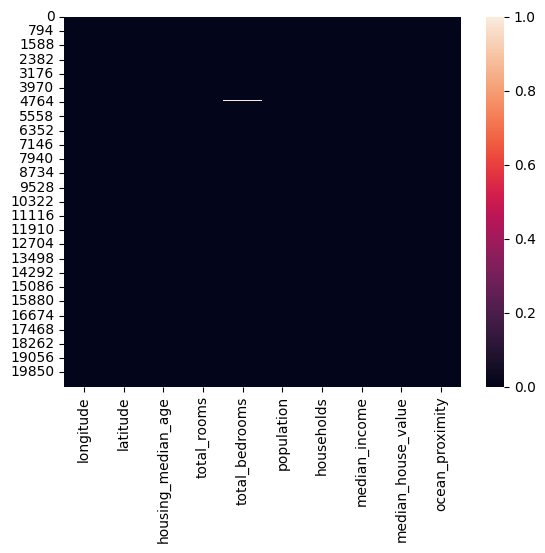

In [9]:
sns.heatmap(df.isnull())

In [10]:
#dropping the null values using dropna
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [12]:
#statistical summary of data
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: xlabel='ocean_proximity', ylabel='count'>

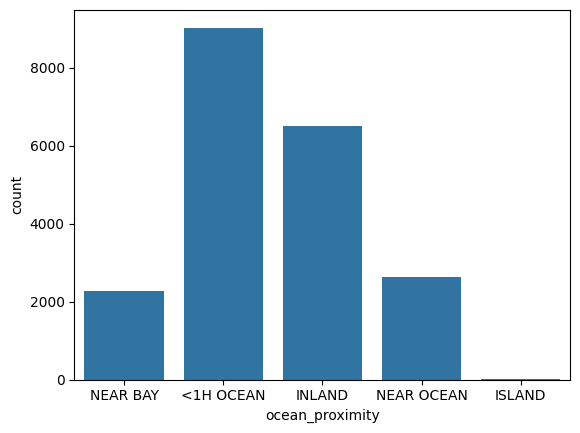

In [13]:
sns.countplot(df, x='ocean_proximity')

<Axes: xlabel='median_income', ylabel='Count'>

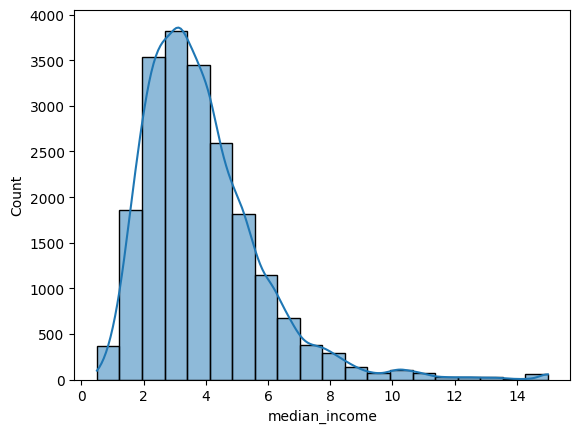

In [14]:
sns.histplot(df, x='median_income', kde=True, bins=20)

In [15]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

<Axes: ylabel='total_rooms'>

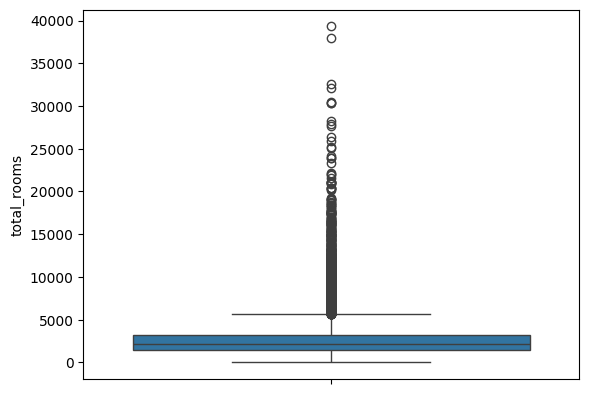

In [16]:
sns.boxplot(df['total_rooms'])

<Axes: ylabel='total_bedrooms'>

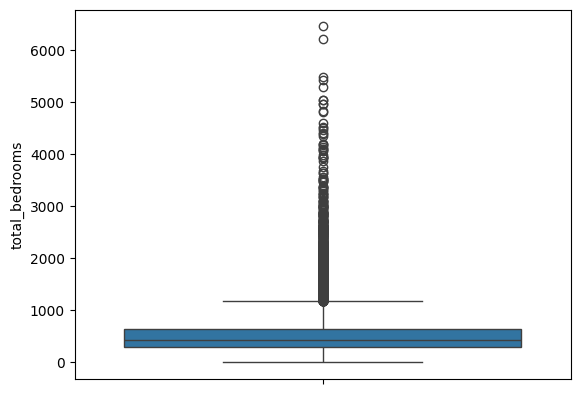

In [17]:
sns.boxplot(df['total_bedrooms'])

<Axes: ylabel='population'>

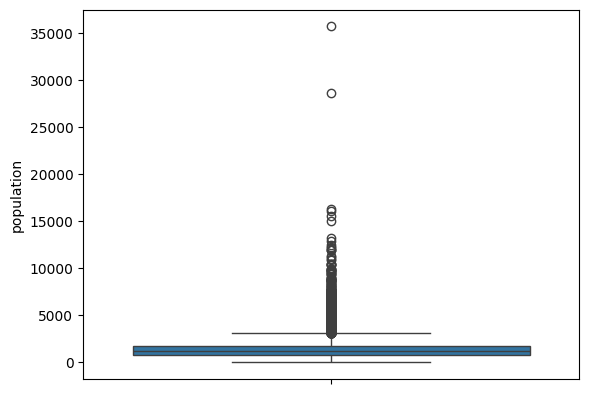

In [18]:
sns.boxplot(df['population'])

<Axes: ylabel='households'>

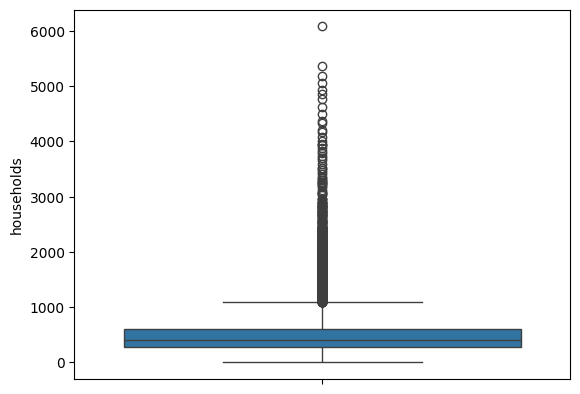

In [19]:
sns.boxplot(df['households'])

<Axes: ylabel='median_income'>

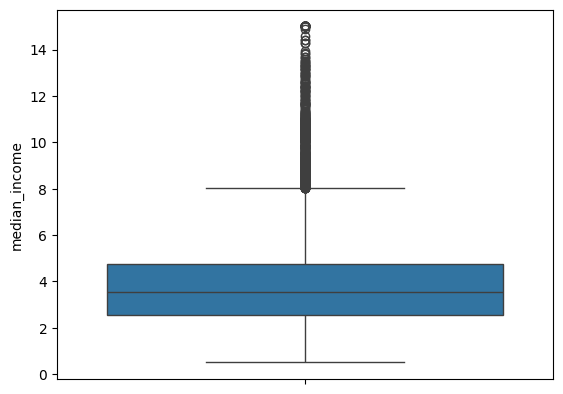

In [20]:
sns.boxplot(df['median_income'])

In [21]:
len(df)

20433

In [22]:
columns = ['total_rooms','total_bedrooms','population','households','median_income']

In [23]:
#outlier removal
def remove_outlier(df,columns):

  for col in columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    df = df[(df[col]>= lower_bound) & (df[col] <= upper_bound)]
  return df

In [24]:
df = remove_outlier(df,columns)

In [25]:
# length of df after outlier removal
len(df)

17357

#Machine Learning Model

<Axes: >

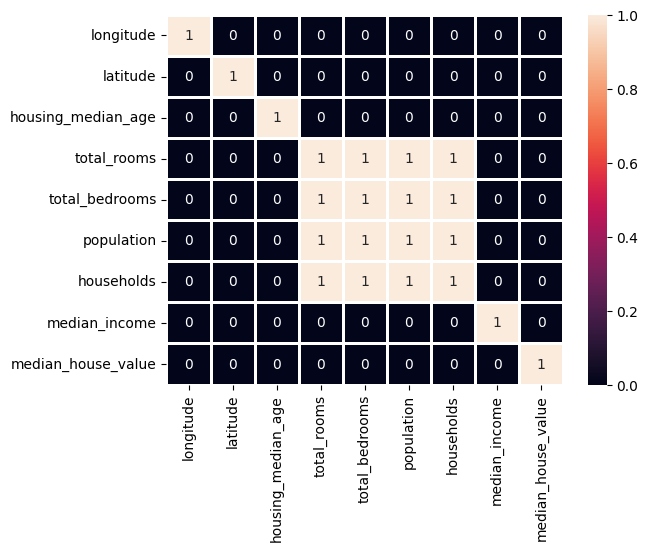

In [26]:
#checking correlation among different features
sns.heatmap(df.corr() > 0.7, linewidths = 2, annot=True)

In [28]:
df.ocean_proximity.value_counts()

<1H OCEAN     7496
INLAND        5680
NEAR OCEAN    2238
NEAR BAY      1938
ISLAND           5
Name: ocean_proximity, dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['ocean_proximity'] = encoder.fit_transform(df['ocean_proximity'])

In [30]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,3
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,3


In [31]:
df.ocean_proximity.value_counts()

0    7496
1    5680
4    2238
3    1938
2       5
Name: ocean_proximity, dtype: int64

In [32]:
x = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [33]:
#test train split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x.shape,x_train.shape,x_test.shape

((17357, 9), (13885, 9), (3472, 9))

In [34]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [46]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

lr = LinearRegression()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
xgb = XGBRegressor()

LinearRegression() --> 0.612697928552494



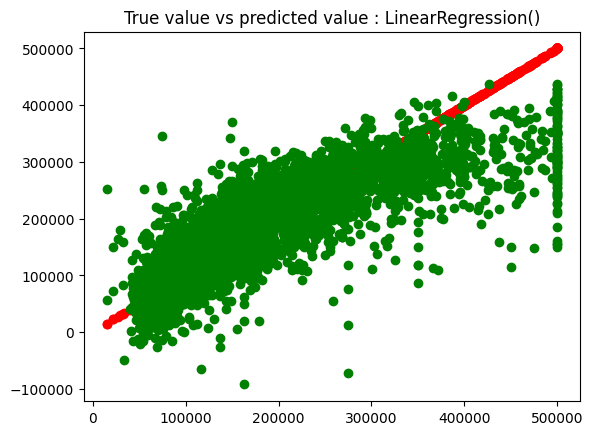



RandomForestRegressor() --> 0.7768252145615153



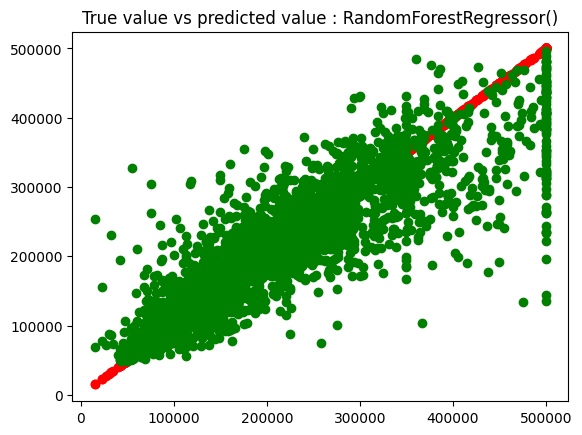



GradientBoostingRegressor() --> 0.7314241188165482



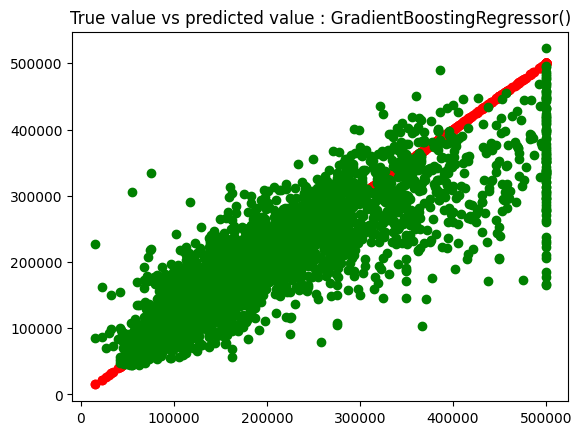



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) --> 0.7985305867324528



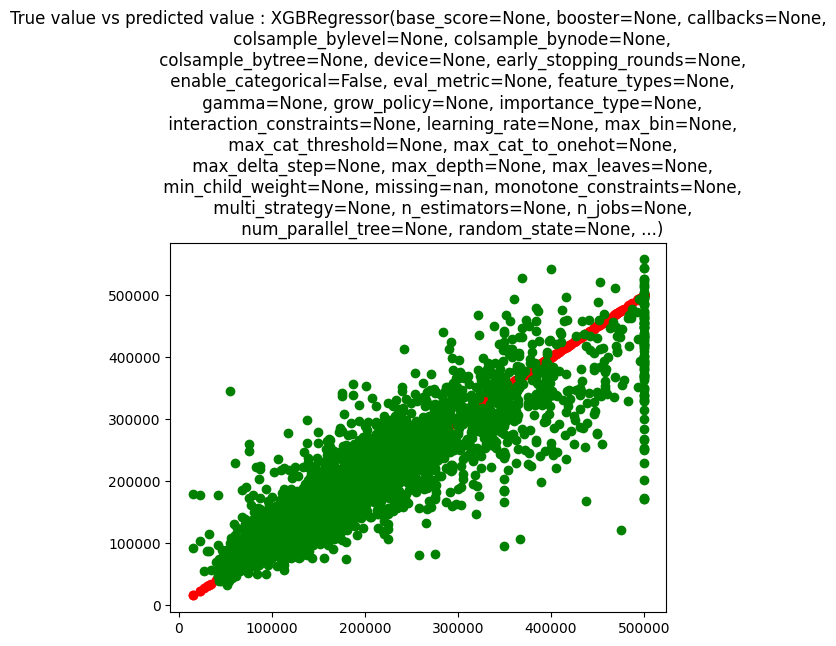

In [47]:
#training the model
for model in (lr,rfr,gbr,xgb):
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  prediction_of_test_data = r2_score(y_test,y_pred)
  print(f'{model} --> {prediction_of_test_data}')
  print()
  plt.scatter(y_test, y_test, color='red', label='Actual Values')
  plt.scatter(y_test, y_pred, color='green', label='Predicted Values')
  plt.title(f'True value vs predicted value : {model}')
  plt.show()
  print()
  print()